# global protest analysis

here we focus on global protest of the world in the year 1990 march to 2020 march

In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data processing

In [2]:
#creating a data frame and reading the files
df = pd.read_csv('/content/data.csv')
df.head().T

,0,1,2,3,4
id,201990001,201990002,201990003,201990004,201990005
Country,Canada,Canada,Canada,Canada,Canada
Year,1990,1990,1990,1990,1990
region,North America,North America,North America,North America,North America
protest,1,1,1,1,1
protesterviolence,0,0,0,1,1
protesterdemand1,"political behavior, process","political behavior, process","political behavior, process",land farm issue,"political behavior, process"
protesterdemand2,labor wage dispute,NaN,NaN,NaN,NaN
protesterdemand3,NaN,NaN,NaN,NaN,NaN
protesterdemand4,NaN,NaN,NaN,NaN,NaN


In [3]:
# to get the number of columns and rows of the dataframe
df.shape

(12652, 25)

In [4]:
# to find existing null values
df.isnull().sum()

,0
id,0
Country,0
Year,0
region,0
protest,0
protesterviolence,0
protesterdemand1,1
protesterdemand2,10091
protesterdemand3,12317
protesterdemand4,12011


In [5]:
# to get statstical measurements of the dataset
df.describe()

,id,Year,protest,protesterviolence,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
count,1.265200e+04,12652.000000,12652.0,12652.000000,12652.000000,12652.000000,12652.000000,12652.000000,12652.000000,12436.000000,12652.000000,12436.000000
mean,4.263609e+09,2006.626620,1.0,0.263990,0.566069,0.446735,0.370286,0.455604,0.420957,0.679471,0.440642,0.439530
std,2.363909e+09,8.812148,0.0,0.440811,0.251981,0.269327,0.201592,0.251682,0.246582,0.161842,0.496484,0.125796
min,2.019900e+08,1990.000000,1.0,0.000000,0.014000,0.006000,0.009000,0.006000,0.034000,0.197000,0.000000,0.237938
25%,2.052018e+09,1999.000000,1.0,0.000000,0.352000,0.211000,0.203000,0.241000,0.213000,0.558000,0.000000,0.309645
50%,3.732010e+09,2008.000000,1.0,0.000000,0.549000,0.403000,0.346000,0.415000,0.331000,0.694000,0.000000,0.455389
75%,6.452011e+09,2014.000000,1.0,1.000000,0.843000,0.755000,0.582000,0.727000,0.680000,0.807000,1.000000,0.539201
max,9.102017e+09,2019.000000,1.0,1.000000,0.922000,0.896000,0.807000,0.886000,0.885000,0.955000,1.000000,0.775399


In [6]:
#to fill null values with unknown in the column'protesterdemand1'
df['protesterdemand1'] = df['protesterdemand1'].fillna('Unknown')
# to fill  null values in the column 'HDI_Score' with the mean value of the column
df['HDI_Score'] = df['HDI_Score'].fillna(df['HDI_Score'].mean())

In [7]:
# to create a saperate dataframe for this columns and filtering the null values and joining them by comma saperation
df['protester_demands'] = df[['protesterdemand1', 'protesterdemand2',
                          'protesterdemand3', 'protesterdemand4']].apply(lambda x: ', '.join(filter(pd.notnull, x)), axis=1)


In [8]:
df.isnull().sum()

,0
id,0
Country,0
Year,0
region,0
protest,0
protesterviolence,0
protesterdemand1,0
protesterdemand2,10091
protesterdemand3,12317
protesterdemand4,12011


In [9]:
# after creating saperate df we are dropping that specific columns and others  from the main dataset
df = df.drop(['protesterdemand2', 'protesterdemand3',
        'protesterdemand4', 'stateresponse2', 'stateresponse3',
        'stateresponse4', 'stateresponse5', 'stateresponse6',
        'stateresponse7'],
        axis=1)
# filling the null values in the specific column 'predicted_prob	216' with its mean value
df['predicted_prob'].fillna(df['predicted_prob'].mean(), inplace=True)

<ipython-input-9-05bebb8e19c7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['predicted_prob'].fillna(df['predicted_prob'].mean(), inplace=True)


In [10]:
# filling the null values in the column 'stateresponse1'  with unknown
df['stateresponse1'] = df['stateresponse1'].fillna('Unknown')

In [11]:
# rechecking the main df
df.isnull().sum()

,0
id,0
Country,0
Year,0
region,0
protest,0
protesterviolence,0
protesterdemand1,0
stateresponse1,0
Electoral_Score,0
Liberal_Score,0


In [37]:
df['protest'].value_counts()

,count
protest,
1,12652


In [12]:
# Grouping the data by country,year and count the number of records in each country,keeping the region column
country_year = df.groupby(['Country', 'Year', 'region']).size().reset_index(name='count')
country_year.head()

,Country,Year,region,count
0,Afghanistan,1991,Asia,1
1,Afghanistan,1997,Asia,1
2,Afghanistan,1998,Asia,1
3,Afghanistan,2002,Asia,1
4,Afghanistan,2005,Asia,2


In [13]:
# another sub df which specifies only the country and its count
data_country = df.groupby('Country').size().reset_index(name='count')
# to get the 10 rows of df in the descending order of count
print(data_country.sort_values('count', ascending=False).head(10))

            Country  count
126  United Kingdom    574
43           France    542
59          Ireland    431
46          Germany    362
65            Kenya    350
9        Bangladesh    338
25            China    316
48           Greece    312
120        Thailand    249
86          Namibia    225


In [14]:
#creating a plot with country vs count
fig = px.bar(data_country, x='Country', y='count')
fig.show()

In [15]:
# creating a df to which contains only year and no of protests happened on each year
protests_by_year = df.groupby('Year')['protest'].sum().reset_index()
# plotting a  line graph that gives insights about no of protests happend on each year
fig = px.line(protests_by_year, x='Year', y='protest',
            title='Number of Protests Over Time',
            labels={'protest': 'Number of Protests', 'Year': 'Year'})
fig.show()

In [16]:
# to make a df which contains region and the number of protests occurred
region_protests = df.groupby('region')['protest'].sum().reset_index()
fig = px.bar(region_protests, x='region', y='protest', color='region',
            title='Regional Distribution of Protests',
            labels={'protest': 'Number of Protests', 'region': 'Region'})
fig.show()


In [17]:
#make a choropleth of country with its name and violence over years
fig = px.choropleth(df, locations='Country', locationmode='country names',
                    color='violenceStatus', animation_frame='Year',
                    title='Protests and Violence Over Time',
                    labels={'violenceStatus': 'Violence Level'})
fig.show()

In [18]:
# protesters demand 1 with its count and its counts
data_demand = df.groupby('protesterdemand1').size().reset_index(name='count')
data_demand = data_demand.sort_values('count', ascending=False)
fig = px.pie(data_demand, values='count', names='protesterdemand1', title='Protester Demand')
fig.show()

In [19]:
# state response on the above demand of protesters and the count(how many cases the state responsed)
data_response = df.groupby('stateresponse1').size().reset_index(name='count')
data_response = data_response.sort_values('count', ascending=False)

fig = px.pie(data_response, values='count', names='stateresponse1', title='State Response')
fig.show()


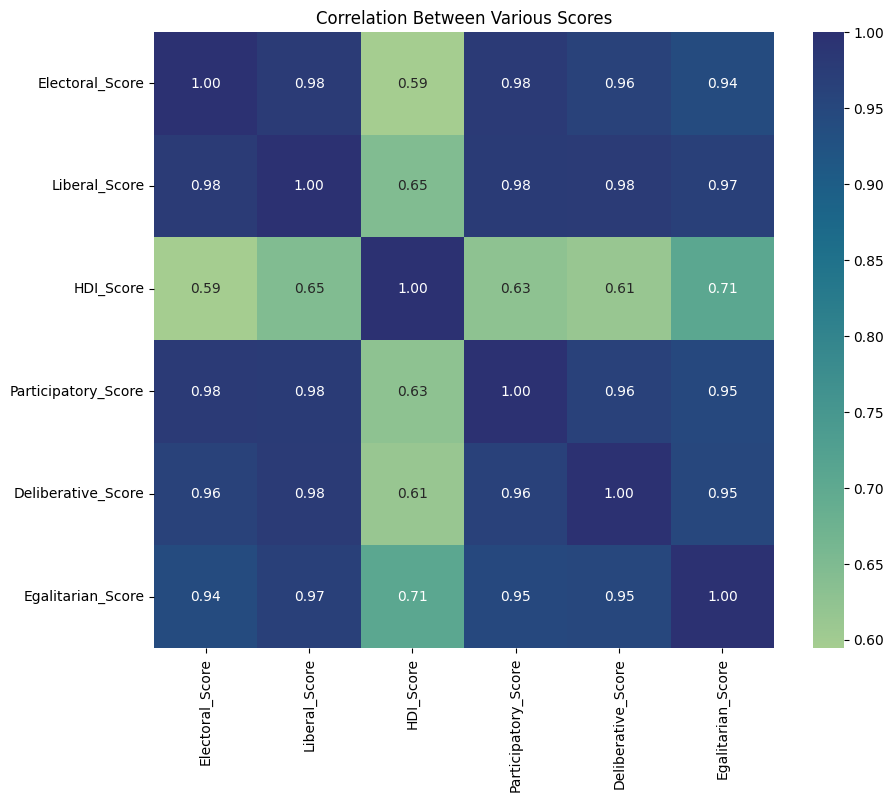

In [20]:
# plotting heatmap of the dataframe df to know the correlated factors amomg these factors
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Electoral_Score', 'Liberal_Score', 'HDI_Score',
                'Participatory_Score', 'Deliberative_Score', 'Egalitarian_Score']].corr(),
            annot=True, cmap='crest', fmt='.2f')
plt.title('Correlation Between Various Scores')
plt.show()

In [21]:
data_numberic= df.select_dtypes(include=['int64','float64'])
data_numberic=data_numberic.drop(['Year','id','protest'],axis=1)

correlation=data_numberic.corr()
# print the correlation matrix plot
fig = px.imshow(correlation, title='Correlation Matrix')
fig.show()


In [22]:
data_response_demand = df.groupby(['stateresponse1', 'protesterdemand1']).size().reset_index(name='count')
data_response_demand['log_count'] = np.log1p(data_response_demand['count'])
fig = px.imshow(data_response_demand.pivot(index='stateresponse1', columns='protesterdemand1', values='log_count').fillna(0), title='Number of records for each state response and protester demand')
# set size of the heatmap
fig.update_layout(width=800, height=800)
fig.show()

In [23]:
# find the violend records in the data for each year
data_violence = df[df['protesterviolence'] == 1]
data_violence_count = data_violence.groupby('Year').size().reset_index(name='vio_count')
# Group data by year and count total records per year

data_violence_trend = df.groupby('Year').size().reset_index(name='total_count')

# Merge total yearly count with violence/no violence counts
data_violence_ratio = data_violence_count.merge(data_violence_trend, on='Year')

In [24]:
# Calculate the ratio of violence/no violence for each year
data_violence_ratio['ratio'] = data_violence_ratio['vio_count'] / data_violence_ratio['total_count']

# Display the first few rows of the resulting dataframe
print(data_violence_ratio.head())

   Year  vio_count  total_count     ratio
0  1990        127          413  0.307506
1  1991         76          276  0.275362
2  1992         86          302  0.284768
3  1993         79          275  0.287273
4  1994        102          337  0.302671


In [25]:
# Plot the ratio of violence records over the years,along with the total number of records and the number of violence records
fig = px.line(data_violence_ratio, x='Year', y='total_count', title='Number of records per year', labels={'total_count': 'Total Records'})
fig.add_scatter(x=data_violence_ratio['Year'], y=data_violence_ratio['vio_count'], name='Violence Records', mode='lines')
fig.add_scatter(x=data_violence_ratio['Year'], y=data_violence_ratio['ratio'], name='Violence Ratio', mode='lines', yaxis='y2', line=dict(dash='dash'))
fig.update_layout(yaxis2={'overlaying': 'y', 'side': 'right', 'title': 'Violence Ratio', 'range': [0, 1]})
fig.show()

In [26]:
data_country_year = df.groupby(['Country', 'Year', 'region']).size().reset_index(name='count')
data_country_year = data_country_year.sort_values(['Year', 'count'], ascending=[True, False])
data_country_year_top10 = data_country_year.groupby('Year').head(10)

fig = px.bar(
    data_country_year_top10,
    y='Country',
    x='count',
    color='region',
    animation_frame='Year',
    title='Top 10 Countries with the Highest Records per Year'
)
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    yaxis_title=None,
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [
            {
                'label': 'Play',
                'method': 'animate',
                'args': [None, {'frame': {'duration': 2000, 'redraw': True}, 'fromcurrent': True}]
            },
            {
                'label': 'Pause',
                'method': 'animate',
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}]
            }
                    ]
    }]
)

fig.show()


In [27]:
data_region_year = df.groupby(['region', 'Year']).size().reset_index(name='count')
fig = px.imshow(data_region_year.pivot(index='region', columns='Year', values='count').fillna(0), title='Number of records in each region per year')
fig.show()
